# DAT405/DIT407 Introduction to Data Science and AI 
## 2022-2023, Reading Period 4
## Assignment 4: Spam classification using Naïve Bayes 
The exercise takes place in this notebook environment.
Hints:
You can execute certain linux shell commands by prefixing the command with `!`. You can insert Markdown cells and code cells. The first you can use for documenting and explaining your results the second you can use writing code snippets that execute the tasks required.  

In this assignment you will implement a Naïve Bayes classifier in Python that will classify emails into spam and non-spam (“ham”) classes.  Your program should be able to train on a given set of spam and “ham” datasets. 
You will work with the datasets available at https://spamassassin.apache.org/old/publiccorpus/. There are three types of files in this location: 
-	easy-ham: non-spam messages typically quite easy to differentiate from spam messages. 
-	hard-ham: non-spam messages more difficult to differentiate 
-	spam: spam messages 

**Execute the cell below to download and extract the data into the environment of the notebook -- it will take a few seconds.** If you chose to use Jupyter notebooks you will have to run the commands in the cell below on your local computer, with Windows you can use 
7zip (https://www.7-zip.org/download.html) to decompress the data.

**What to submit:** 
Convert the notebook to a pdf-file and submit it. Make sure all cells are executed so all your code and its results are included. Double check the pdf displays correctly before you submit it.

## Julia Szczepaniak 10 h
## Binsha Nazar Othupalliparambu Nazar 10 h

In [1]:
!mkdir datasets
%cd datasets
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_spam.tar.bz2
!tar -xjf 20021010_easy_ham.tar.bz2
!tar -xjf 20021010_hard_ham.tar.bz2
!tar -xjf 20021010_spam.tar.bz2
%cd ..

mkdir: nie można utworzyć katalogu „datasets”: Plik istnieje
/home/piotr/Pulpit/jula/datasets
--2023-04-25 13:26:31--  https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
Translacja spamassassin.apache.org (spamassassin.apache.org)... 151.101.2.132, 2a04:4e42::644
Łączenie się z spamassassin.apache.org (spamassassin.apache.org)|151.101.2.132|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: 1677144 (1,6M) [application/x-bzip2]
Zapis do: ‘20021010_easy_ham.tar.bz2.3’

20021010_easy_ham.t 100%[===================>]   1,60M  7,52MB/s    w 0,2s     

2023-04-25 13:26:32 (7,52 MB/s) - zapisano ‘20021010_easy_ham.tar.bz2.3’ [1677144/1677144]

--2023-04-25 13:26:32--  https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
Translacja spamassassin.apache.org (spamassassin.apache.org)... 151.101.2.132, 2a04:4e42::644
Łączenie się z spamassassin.apache.org (spamassassin.apache.org)|151.101.2.132|:443... połączono.
Żądan

### 1. Preprocessing: 

##### 1.1 Look at a few emails from easy_ham, hard_ham and spam. Do you think you would be able to classify the emails just by inspection? How do you think a succesful model can learn the difference between the different classes of emails?

In [3]:
import os

In [4]:
def get_emails(directory):
    for file in os.listdir(directory)[24:27]:
      with open(os.path.join(directory,file), encoding='latin-1') as f:
        if f is not None:
          content = f.read()
        print(content)
    return 0


print("===============3 emails from easy_ham:================\n\n")
get_emails('./datasets/easy_ham')

print("===============3 emails from hard_ham:================\n\n")
get_emails('./datasets/hard_ham')

print("===============3 emails from spam:====================\n\n")
get_emails('./datasets/spam')

===========================================3 emails from easy_ham:===============================================


From rpm-list-admin@freshrpms.net  Thu Aug 29 10:58:24 2002
Return-Path: <rpm-zzzlist-admin@freshrpms.net>
Delivered-To: yyyy@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id E43ED44157
	for <jm@localhost>; Thu, 29 Aug 2002 05:58:14 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for jm@localhost (single-drop); Thu, 29 Aug 2002 10:58:14 +0100 (IST)
Received: from egwn.net (ns2.egwn.net [193.172.5.4]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7SMC3Z12215 for
    <jm-rpm@jmason.org>; Wed, 28 Aug 2002 23:12:03 +0100
Received: from auth02.nl.egwn.net (localhost [127.0.0.1]) by egwn.net
    (8.11.6/8.11.6/EGWN) with ESMTP id g7SMB2J08733; Thu, 29 Aug 2002 00:11:02
    +0200
Received: from posti.pp.htv.fi (posti.pp.htv.fi [212.90.64.50]) by
  

0

Answer 1.1:
After getting to title and main part of the email it was quite easy to say if it was a spam or ham. However it takes time to find the message in html or css commands. Probably some information is hidden also in headers but it was too hard to read. I think I would be able to classify these emails just by inspection but not very easily. We think a succesful model can learn the difference between the different classes of emails by counting how many times certaint words or word combinations occur in an email class.

##### 1.2 Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text (in the optional part further down can experiment with filtering out the headers and footers). We don’t want to train and test on the same data (it might help to reflect on why if you don't recall). Split the spam and the ham datasets in a training set and a test set. (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`). Use only the easy_ham part as ham data for quesions 1 and 2.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from email import message_from_string
import matplotlib.pyplot as plt
import pandas as pd
import email.policy

In [6]:
def extract_emails(directory, class_name):
    rows = []
    for file in os.listdir(directory):
      with open(os.path.join(directory,file), encoding='latin-1') as f:
        if f is not None:
          content = f.read()
          rows.append({'email': message_from_string(content, policy=email.policy.default), 'content': content, 
                       'class': class_name})
    return pd.DataFrame(rows)

# extract emails and add class information
df_easy_ham = extract_emails('./datasets/easy_ham', 'ham')
df_hard_ham = extract_emails('./datasets/hard_ham', 'ham')
df_spam = extract_emails('./datasets/spam', 'spam')

# join the two dataframes
df_easy_ham_spam = pd.concat([df_easy_ham, df_spam])

print('Easy ham:', + len(df_easy_ham))
print('Hard ham:', + len(df_hard_ham))
print('Spam:', + len(df_spam))
df_easy_ham_spam.sample(5)

Easy ham: 2551
Hard ham: 250
Spam: 501


,email,content,class
2278,"[Return-Path, Delivered-To, Received, Received...",From spamassassin-talk-admin@lists.sourceforge...,ham
228,"[Return-Path, Delivered-To, Received, Received...",From rssfeeds@jmason.org Thu Oct 10 12:32:34 ...,ham
1487,"[Return-Path, Delivered-To, Received, Received...",From rssfeeds@jmason.org Mon Oct 7 12:05:23 ...,ham
173,"[Return-Path, Delivered-To, Received, Received...",From rpm-list-admin@freshrpms.net Wed Oct 9 ...,ham
937,"[Return-Path, Delivered-To, Received, Received...",From rssfeeds@jmason.org Tue Sep 24 10:47:39 ...,ham


Since we don’t want to train and test on the same data and thereby we tried to split the spam and the ham datasets in a training set and a test set (`hamtrain`, `spamtrain`, `hamtest` and `spamtest`). So, code for splitting the data is shown below:

In [7]:
# pre-processing code here
X = df_easy_ham_spam['content']
y = df_easy_ham_spam['class']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# print shapes
print('df_easy_ham_spam:', df_easy_ham_spam.shape)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

df_easy_ham_spam: (3052, 3)
X_train: (2441,)
X_test: (611,)
y_train: (2441,)
y_test: (611,)


### 2.1 Write a Python program that: 
1.	Uses the four datasets from Question 1 (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`) 
2.	Trains a Naïve Bayes classifier (use the [scikit-learn library](https://scikit-learn.org/stable/)) on `hamtrain` and `spamtrain`, that classifies the test sets and reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets. Use `CountVectorizer` ([Documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)) to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifier in scikit-learn ([Documentation here](https://scikit-learn.org/stable/modules/naive_bayes.html)). Test two of these classifiers that are well suited for this problem:
    - Multinomial Naive Bayes  
    - Bernoulli Naive Bayes. 

Please inspect the documentation to ensure input to the classifiers is appropriate before you start coding. 



Trained on easy ham vs spam, run on easy ham vs spam
True positive multinomial: 0.9961612284069098
True negative multinomial 0.8555555555555555
True positive bernoulli: 0.9942418426103646
True negative bernoulli: 0.45555555555555555


Text(0.5, 0.98, 'Trained on spam vs easy ham, run on spam vs easy ham')

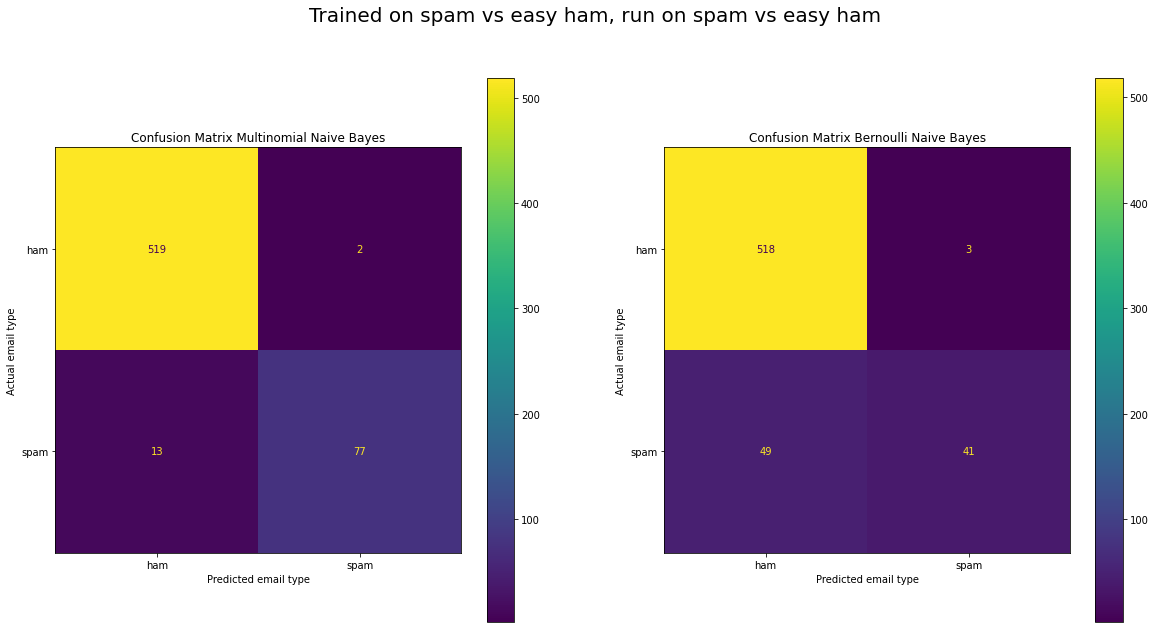

In [8]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# instantiate a Count Vectorizer and fit for training data
cv = CountVectorizer()
X_train_vector = cv.fit_transform(X_train)
X_test_vector = cv.transform(X_test)

# fit models using training vector
multinomial_naive_bayes = MultinomialNB().fit(X_train_vector, y_train)
bernoulli_naive_bayes = BernoulliNB().fit(X_train_vector, y_train)

# make predictions on the test data
y_pred_multinomial = multinomial_naive_bayes.predict(X_test_vector)
y_pred_bernoulli = bernoulli_naive_bayes.predict(X_test_vector)

 # calculate the true positive and false negatives
tn1, fp1, fn1, tp1 = confusion_matrix(y_test,y_pred_multinomial).ravel()
tn2, fp2, fn2, tp2 = confusion_matrix(y_test,y_pred_bernoulli).ravel()

print ("Trained on easy ham vs spam, run on easy ham vs spam")
print ("True positive multinomial: " + str(tn1/(fp1+tn1)))
print ("True negative multinomial " + str(tp1/(fn1+tp1)))
print ("True positive bernoulli: " + str(tn2/(fp2+tn2)))
print ("True negative bernoulli: " + str(tp2/(fn2+tp2)))

# plot confusion matrices
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
cm1 = confusion_matrix(y_test,y_pred_multinomial)
ConfusionMatrixDisplay(cm1, display_labels=multinomial_naive_bayes.classes_).plot(ax=ax1)
ax1.set_title("Confusion Matrix Multinomial Naive Bayes")
ax1.set_xlabel("Predicted email type")
ax1.set_ylabel("Actual email type")

cm2 = confusion_matrix(y_test,y_pred_bernoulli)
ConfusionMatrixDisplay(cm2, display_labels=bernoulli_naive_bayes.classes_).plot(ax=ax2)
ax2.set_title('Confusion Matrix Bernoulli Naive Bayes')
ax2.set_xlabel("Predicted email type")
ax2.set_ylabel("Actual email type")
plt.suptitle("Trained on spam vs easy ham, run on spam vs easy ham", fontsize=20)


### 2.2 Answer the following questions:
##### a) What does the CountVectorizer do?
CountVectorizer is a text preprocessing technique in Natural Language Processing (NLP) that converts a collection of text documents to a matrix of token counts. It tokenizes the text data and counts the frequency of each token in the text. The resulting matrix can be used as input for machine learning algorithms, such as Naive Bayes, to classify text into different categories based on their frequency of occurrence. In short, CountVectorizer converts text data into numerical data that can be processed by machine learning algorithms.

##### b) What is the difference between Multinomial Naive Bayes and Bernoulli Naive Bayes



Multinomial Naive Bayes and Bernoulli Naive Bayes are both variants of the Naive Bayes algorithm used for classification problems in machine learning. However, they differ in the way they handle the input features.

As the confusion matrices show, the **Multinomial Naive Bayes** model outperforms the **Bernoulli Naive Bayes** model as it suffers from way less misclassifications, and consequently classifies new emails with a higher accuracy. Interestingly enough, both models seem to correctly classify "ham" or non-spam mail with similar accuracy. It's the false negative case, when the model classifies a spam mail as "ham", that separates the two models, with the **Multinomial Naive Bayes** model being more accurate here.

The big difference between **Multinomial Naive Bayes** and **Bernoulli Naive Bayes** is that **Multinomial** takes into account the frequency of the words whilst **Bernoulli** works binary and thus only checks if the word exist or not. This will make **Multinomial** more suited for this task since the a) the dataset is not to large and b) the frequency seems to matter. If the dataset were larger or a different question that is more binary suited then **Bernoulli** be better suited.

### 3.1 Run the two models:
Run (don't retrain) the two models from Question 2 on spam versus hard-ham. Does the performance differ compared to question 2 when the model was run on spam versus easy-ham? If so, why?

Trained on spam vs easy ham, evaluated on spam vs hard ham
True positive multinomial: 0.324
True negative multinomial 0.9461077844311377
True positive bernoulli: 0.332
True negative bernoulli: 0.5688622754491018


Text(0.5, 0.98, 'Trained on spam vs easy ham, run on spam vs hard ham')

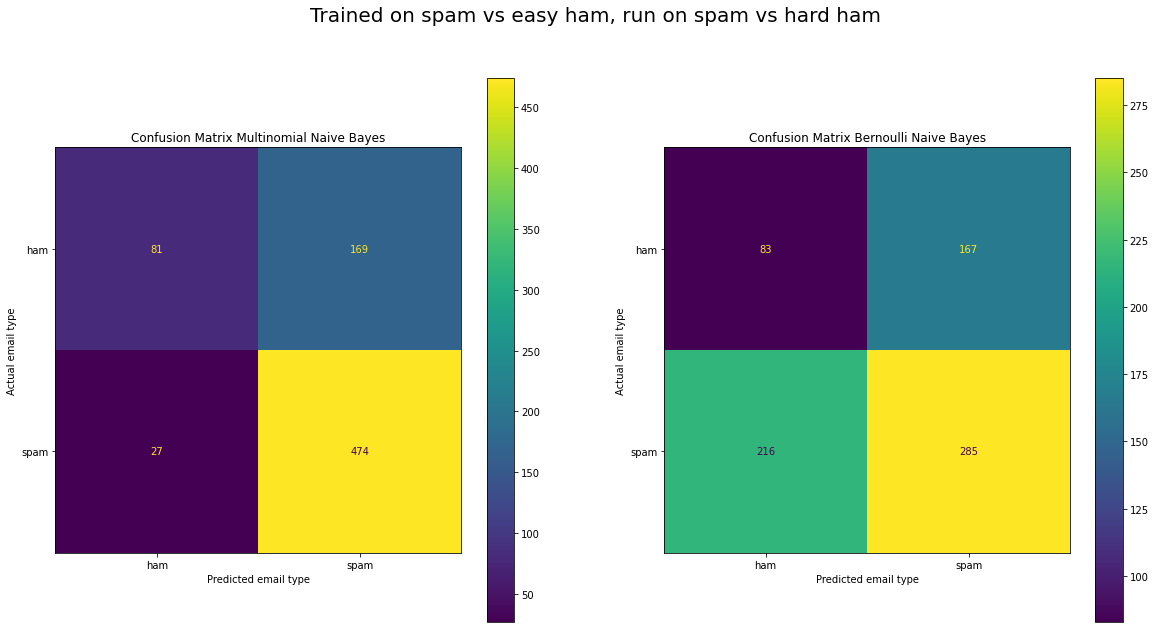

In [9]:
# Prepare data for testing
df_hard_ham_spam = pd.concat([df_hard_ham, df_spam])
X_test = df_hard_ham_spam['content']
y_test = df_hard_ham_spam['class']

# Count words and make a test vector 
X_test_vector = cv.transform(X_test)

# Make predictions on the test data
y_pred_multinomial = multinomial_naive_bayes.predict(X_test_vector)
y_pred_bernoulli = bernoulli_naive_bayes.predict(X_test_vector)

# Calculate the true positive and false negatives
tn1, fp1, fn1, tp1 = confusion_matrix(y_test,y_pred_multinomial).ravel()
tn2, fp2, fn2, tp2 = confusion_matrix(y_test,y_pred_bernoulli).ravel()

print ('Trained on spam vs easy ham, evaluated on spam vs hard ham')
print ("True positive multinomial: " + str(tn1/(fp1+tn1)))
print ("True negative multinomial " + str(tp1/(fn1+tp1)))
print ("True positive bernoulli: " + str(tn2/(fp2+tn2)))
print ("True negative bernoulli: " + str(tp2/(fn2+tp2)))

# Plot confusion matrices
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
cm1 = confusion_matrix(y_test,y_pred_multinomial)
ConfusionMatrixDisplay(cm1, display_labels=multinomial_naive_bayes.classes_).plot(ax=ax1)
ax1.set_title("Confusion Matrix Multinomial Naive Bayes")
ax1.set_xlabel("Predicted email type")
ax1.set_ylabel("Actual email type")

cm2 = confusion_matrix(y_test,y_pred_bernoulli)
ConfusionMatrixDisplay(cm2, display_labels=bernoulli_naive_bayes.classes_).plot(ax=ax2)
ax2.set_title('Confusion Matrix Bernoulli Naive Bayes')
ax2.set_xlabel("Predicted email type")
ax2.set_ylabel("Actual email type")
plt.suptitle('Trained on spam vs easy ham, run on spam vs hard ham',fontsize=20)

Answer 3.1: The results are worse than when the model was run on spam versus easy-ham. In training there were ham emails which were easy to distinguish from the spam. Now we have more spam classified as ham because samples in training were not even and more ham classified as a spam because there are emails harder to differentiate from spam.

### 3.2 Retrain
Retrain new Multinomial and Bernoulli Naive Bayes classifers on the combined (easy+hard) ham and spam. Now evaluate on spam versus hard-ham as in 3.1. Also evaluate on spam versus easy-ham. Compare the performance with question 2 and 3.1. What do you observe?

In [10]:
df_combined = pd.concat([df_hard_ham_spam, df_easy_ham])
X = df_combined['content']
y = df_combined['class']
df_combined.shape

(3302, 3)

Evaluation on hard ham vs spam
True positive multinomial: 0.988
True negative multinomial 0.9580838323353293
True positive bernoulli: 0.972
True negative bernoulli: 0.34331337325349304


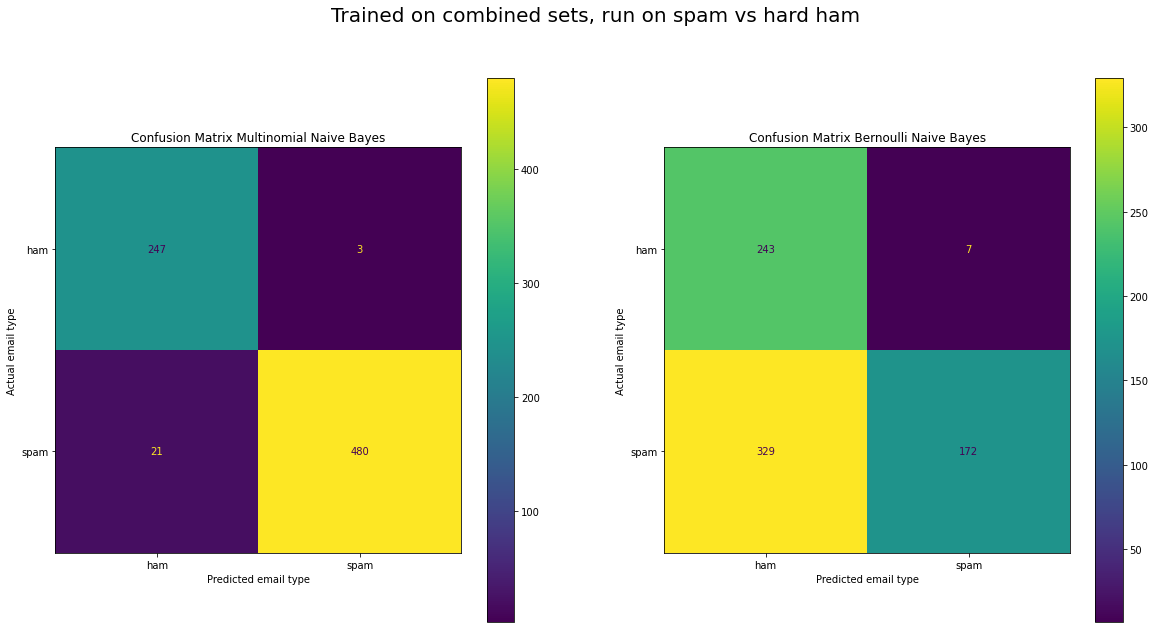

Evaluation on easy ham vs spam
True positive multinomial: 1.0
True negative multinomial 0.9580838323353293
True positive bernoulli: 0.999607996863975
True negative bernoulli: 0.34331337325349304


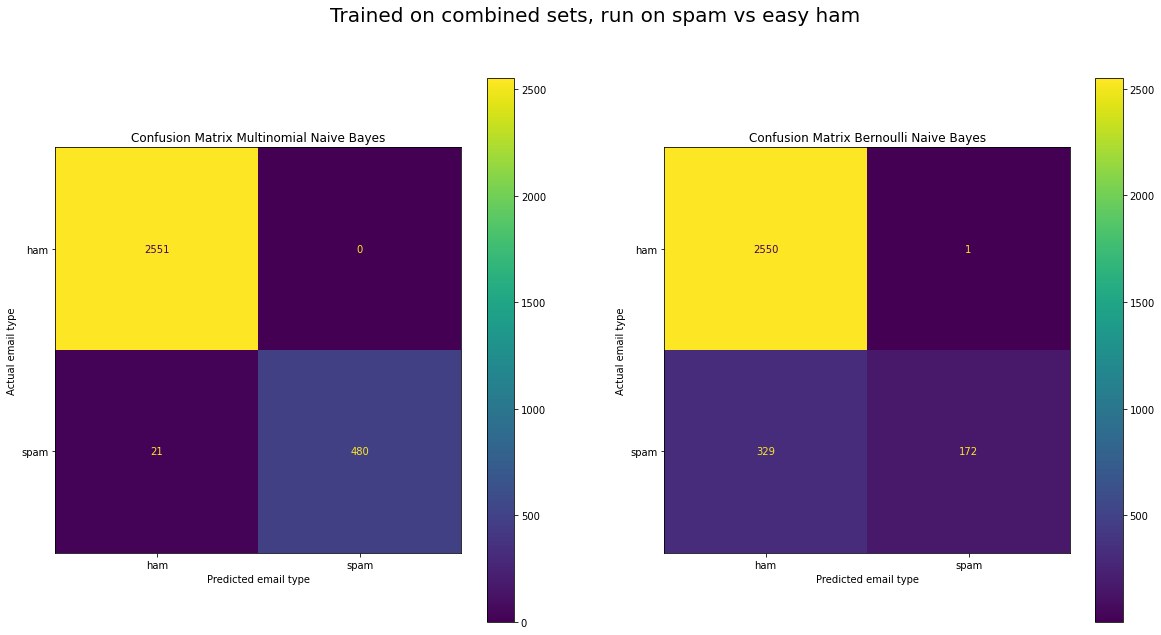

In [11]:
################################### Training on combined datasets ##########################################

# Prepare dataset
df_combined = pd.concat([df_hard_ham_spam, df_easy_ham])
X = df_combined['content']
y = df_combined['class']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Count words, make a vector and fit for training data
X_train_vector = cv.fit_transform(X_train)
X_test_vector = cv.transform(X_test)

# Fit models using training vector
multinomial_naive_bayes = MultinomialNB().fit(X_train_vector, y_train)
bernoulli_naive_bayes = BernoulliNB().fit(X_train_vector, y_train)

#################################### Evaluating on hard ham vs spam #########################################

# Prepare data for testing 
X_test = df_hard_ham_spam['content']
y_test = df_hard_ham_spam['class']

# Count words and make a training vector
X_test_vector = cv.transform(X_test)

# Make predictions on the test data using the test vector
y_pred_multinomial = multinomial_naive_bayes.predict(X_test_vector)
y_pred_bernoulli = bernoulli_naive_bayes.predict(X_test_vector)

# Calculate the true positives and false negatives
tn1, fp1, fn1, tp1 = confusion_matrix(y_test,y_pred_multinomial).ravel()
tn2, fp2, fn2, tp2 = confusion_matrix(y_test,y_pred_bernoulli).ravel()

print ('Evaluation on hard ham vs spam')
print ("True positive multinomial: " + str(tn1/(fp1+tn1)))
print ("True negative multinomial " + str(tp1/(fn1+tp1)))
print ("True positive bernoulli: " + str(tn2/(fp2+tn2)))
print ("True negative bernoulli: " + str(tp2/(fn2+tp2)))

# Plot confusion matrices
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
cm1 = confusion_matrix(y_test,y_pred_multinomial)
ConfusionMatrixDisplay(cm1, display_labels=multinomial_naive_bayes.classes_).plot(ax=ax1)
ax1.set_title("Confusion Matrix Multinomial Naive Bayes")
ax1.set_xlabel("Predicted email type")
ax1.set_ylabel("Actual email type")
cm2 = confusion_matrix(y_test,y_pred_bernoulli)
ConfusionMatrixDisplay(cm2, display_labels=bernoulli_naive_bayes.classes_).plot(ax=ax2)
ax2.set_title('Confusion Matrix Bernoulli Naive Bayes')
ax2.set_xlabel("Predicted email type")
ax2.set_ylabel("Actual email type")
plt.suptitle('Trained on combined sets, run on spam vs hard ham',fontsize=20)
plt.show()

###################################### Evaluating on easy ham vs spam #######################################

X_test = df_easy_ham_spam['content']
y_test = df_easy_ham_spam['class']

X_test_vector = cv.transform(X_test)

# Make predictions on the test data
y_pred_multinomial = multinomial_naive_bayes.predict(X_test_vector)
y_pred_bernoulli = bernoulli_naive_bayes.predict(X_test_vector)

# Calculate the true positives and false negatives
tn1, fp1, fn1, tp1 = confusion_matrix(y_test,y_pred_multinomial).ravel()
tn2, fp2, fn2, tp2 = confusion_matrix(y_test,y_pred_bernoulli).ravel()


print ('Evaluation on easy ham vs spam')
print ("True positive multinomial: " + str(tn1/(fp1+tn1)))
print ("True negative multinomial " + str(tp1/(fn1+tp1)))
print ("True positive bernoulli: " + str(tn2/(fp2+tn2)))
print ("True negative bernoulli: " + str(tp2/(fn2+tp2)))

# Plot confusion matrices
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
cm1 = confusion_matrix(y_test,y_pred_multinomial)
ConfusionMatrixDisplay(cm1, display_labels=multinomial_naive_bayes.classes_).plot(ax=ax1)
ax1.set_title("Confusion Matrix Multinomial Naive Bayes")
ax1.set_xlabel("Predicted email type")
ax1.set_ylabel("Actual email type")
cm2 = confusion_matrix(y_test,y_pred_bernoulli)
ConfusionMatrixDisplay(cm2, display_labels=bernoulli_naive_bayes.classes_).plot(ax=ax2)
ax2.set_title('Confusion Matrix Bernoulli Naive Bayes')
ax2.set_xlabel("Predicted email type")
ax2.set_ylabel("Actual email type")
plt.suptitle('Trained on combined sets, run on spam vs easy ham',fontsize=20)
plt.show()

Answer 3.2: The performance on hard ham is better after training on the combined sets. Now the model knows how hard ham looks like and how to classify such emails. Performance on easy ham is equally good as after training only on easy ham. Just the same number on emails was misclassified.

### 3.3 Further improvements
Do you have any suggestions for how performance could be further improved? You don't have to implement them, just present your ideas.

Answer 3.3:

- To improve performance we could train the model on a larger set of data. 
- The training data should should differ in terms of how hard it is to tell what is spam. In other words there should be a lot of hard ham. 
- We should have similar number of spam and ham to avoid bias in probability calculation.
- We could try other models.